# MINI PROJECT DA

### TENTANG DATA

Sumber Data: Kaggle https://www.kaggle.com/datasets/zaurbegiev/my-dataset/data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.gridspec as gridspec
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.subplots import make_subplots

In [2]:
DF = pd.read_csv('/content/drive/MyDrive/PROJECT_DA/DATASET/credit_train.csv')
DF.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


### EXPLORATORY DATA ANALYST (EDA) DARI DATASET

In [3]:
DF.info() #untuk cek type dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [5]:
#cek jumlah kolom dan baris
print('jumlah kolom', DF.shape[1])
print('jumlah baris', DF.shape[0])

jumlah kolom 19
jumlah baris 100514


Saya akan menghapus kolom Loan ID dan Customer ID

In [6]:
DF = DF.drop(columns={'Loan ID', 'Customer ID'})

Cek data duplikat

In [7]:
DF.duplicated().sum()

10728

In [8]:
DF.drop_duplicates(inplace=True) # hapus data duplikat
DF.duplicated().sum()

0

### OUTLIER

Setelah mengecek duplikat dan menghapus kolom yang tidak diperlukan, saya akan mengecek nilai outlier (nilai yang berada jauh dari mayoritas yang ada)

In [9]:
list_DF = list(DF.select_dtypes('float').columns)                     #membuat list dari kolom DF dengan type data float
figure = make_subplots(rows=4, cols=3, subplot_titles=list_DF)      #membuat subplot

i=0                                                                   #variabel untuk mengakses kolom
for row in range(4):                                                   #loop untuk mengakses baris
  for col in range(3):                                                 #loop untuk mengakses kolom
    box_plot = go.Box(x=DF[list_DF[i]], name='')                      #membuat box plot
    figure.add_trace(box_plot, row=row+1, col=col+1)

    i+= 1
    if i==len(list_DF):
      break

figure.update_layout(title_text = 'cek nilai outlier',
                     titlefont=dict(size=22),
                     showlegend=False)

figure.show()

Output hidden; open in https://colab.research.google.com to view.

setelah dilihat nilai outler maka saya akan menganalisis beberapa nilai outler yaitu nilai outler dari kolom jumlah pinjaman saat ini, kredit score. dan pendapatan tahunan. analisis yang digunakan menggunakan analisis kuartil

In [10]:
cols = ['Current Loan Amount', 'Credit Score', 'Annual Income']

In [11]:
def handle_outler(column):
  Q1 = DF[column].quantile(0.25)
  Q3 = DF[column].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  return DF[(DF[column] > lower) & (DF[column] < upper)]

In [12]:
for col in cols:
  DF = handle_outler(col)

In [13]:
list_DF = list(DF.select_dtypes('float').columns)
figure = make_subplots(rows=4 , cols=3, subplot_titles=list_DF)

i= 0
for row in range(4):
  for col in range(3):
    box_plot = go.Box(x=DF[list_DF[i]], name='')
    figure.add_trace(box_plot, row=row+1, col=col+1)

    i+= 1
    if i==len(DF):
      break


figure.show()

Output hidden; open in https://colab.research.google.com to view.

### Missing Value

Setelah mengecek nilai outlier sekarang akan mengecek nilai kosong pada dataset


In [14]:
DF.isna().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Annual Income                       0
Years in current job             2225
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    26850
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      100
Tax Liens                           4
dtype: int64

In [15]:
DF.dropna(how='all', inplace=True)    #untuk menghapus missing values jika dalam semua nilai dalam satu baris missing values

In [16]:
DF.isna().all(axis=1).sum()

0

In [17]:
DF.isna().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Annual Income                       0
Years in current job             2225
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    26850
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      100
Tax Liens                           4
dtype: int64

Terdapat nilai hilang pada kolom pekerjaan, bulan tunggakan trakhir, kerugian, pajak

In [18]:
DF['Years in current job'].value_counts()

Years in current job
10+ years    15439
2 years       4548
< 1 year      4114
3 years       4077
5 years       3432
1 year        3215
4 years       3064
6 years       2846
7 years       2743
8 years       2314
9 years       1941
Name: count, dtype: int64

In [19]:
DF["Years in current job"].fillna("10+ years", inplace=True)    #ganti miising values ke nilai 10+years

In [20]:
DF['Years in current job'].value_counts()

Years in current job
10+ years    17664
2 years       4548
< 1 year      4114
3 years       4077
5 years       3432
1 year        3215
4 years       3064
6 years       2846
7 years       2743
8 years       2314
9 years       1941
Name: count, dtype: int64

In [21]:
DF["Bankruptcies"].fillna(0, inplace=True)
DF["Tax Liens"].fillna(0, inplace=True)

In [22]:
DF.isna().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Annual Income                       0
Years in current job                0
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    26850
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
dtype: int64

In [23]:
DF.drop(columns={"Months since last delinquent"}, inplace=True) #hapus kolom

### ANALISIS

Analisis secara statistik

In [24]:
DF.describe().astype(int)

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,49958,49958,49958,49958,49958,49958,49958,49958,49958,49958,49958
mean,295691,721,1236547,17338,18,11,0,272146,677119,0,0
std,175558,22,540281,10342,6,4,0,274727,4718164,0,0
min,11242,655,76627,0,3,1,0,0,0,0,0
25%,161749,708,831630,9883,13,8,0,110280,269852,0,0
50%,260656,725,1143876,15601,16,10,0,203347,458777,0,0
75%,401038,740,1555411,22907,21,14,0,350488,762729,0,0
max,789250,751,2846295,79808,70,76,15,7423870,798255370,7,15


### VISUALISASI DATA

In [25]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49958 entries, 0 to 99998
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                49958 non-null  object 
 1   Current Loan Amount        49958 non-null  float64
 2   Term                       49958 non-null  object 
 3   Credit Score               49958 non-null  float64
 4   Annual Income              49958 non-null  float64
 5   Years in current job       49958 non-null  object 
 6   Home Ownership             49958 non-null  object 
 7   Purpose                    49958 non-null  object 
 8   Monthly Debt               49958 non-null  float64
 9   Years of Credit History    49958 non-null  float64
 10  Number of Open Accounts    49958 non-null  float64
 11  Number of Credit Problems  49958 non-null  float64
 12  Current Credit Balance     49958 non-null  float64
 13  Maximum Open Credit        49958 non-null  float64


#### Visualisasi dari Status pinjaman

In [26]:
DF['Loan Status'].value_counts()

Loan Status
Fully Paid     38551
Charged Off    11407
Name: count, dtype: int64

<ipython-input-27-402ab3b7569c>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




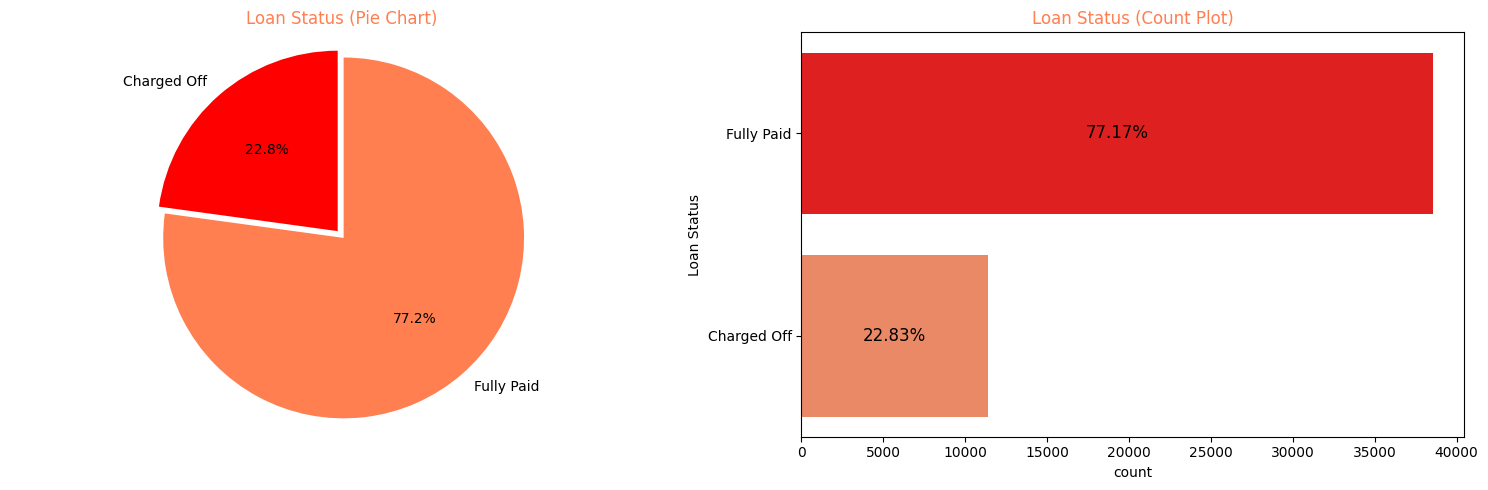

In [27]:
plt.figure(figsize=(15,5))

DATA_Pie_Data = DF.groupby('Loan Status')
Pie_Label = sorted([i for i in DF.loc[:, 'Loan Status'].unique()])

# Plot 1 - Pie Chart
plt.subplot(121)
plt.pie(DATA_Pie_Data['Loan Status'].count(), labels= Pie_Label, explode= (0, 0.1), startangle= 90,
        autopct = '%1.1f%%', radius = 2, colors=['red', 'coral'])
plt.title('Loan Status (Pie Chart)', color='coral')
plt.axis('equal')

# Plot 2 - Count Plot
plt.subplot(122)
ax = sns.countplot(y=DF["Loan Status"], palette=['red', 'coral'])
for i,v in enumerate(DF['Loan Status'].value_counts()):
    ax.text(v/2, i, '{:.2f}%'.format((v/len(DF['Loan Status']))*100), ha="center", va="center", fontsize=12, color='black')
plt.title('Loan Status (Count Plot)', color='coral')

plt.tight_layout()
plt.show()

setelah melihat status pinjaman, sekarang mari kita lihat status pinjaman ini berdasarkan jumlah pinjamannya

In [28]:
color = ["red", "coral"]

fig = px.box(DF, x="Loan Status", y="Current Loan Amount", color="Loan Status",
             title="Current Loan Amount By Loan Status",
             color_discrete_sequence=color)

fig.update_layout(title_font=dict(size=25))
fig.show()

Dari grafik dapat disimpulkan bahwa jumlah pinjaman yang dibebankan sedikit lebih banyak daripada dibayarkan penuh

In [29]:
x1 = DF[DF["Loan Status"]=="Fully Paid"]["Credit Score"]
x2 = DF[DF["Loan Status"]=="Charged Off"]["Credit Score"]

hist_data = [x1, x2]
group_labels = ["Fully Paid", "Charged Off"]

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=["red", "coral"])

fig.update_layout(title_text="credit score by loan status",
                  title_font=dict(size=25),
                  xaxis_title="credit score")
fig.show()

In [34]:
x1 = DF[DF["Loan Status"]=="Fully Paid"]["Annual Income"]
x2 = DF[DF["Loan Status"]=="Charged Off"]["Annual Income"]

hist_data = [x1, x2]
group_labels = ["Fully Paid", "Charged Off"]

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=["red", "coral"])

fig.update_layout(title_text="The Annual Income by loan status",
                  title_font=dict(size=25),
                  xaxis_title="Annual Income")
fig.show()